#PyTorch定义${\color{red}{神经网络}}$

In [19]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import helper

%matplotlib inline

In [18]:
## 下载数据
# transform将图片转换为神经网络需要的数据
# 图像每个通道元素-0.5，然后再除以0.5，从0-1转变为-1到1
transform= transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

## 训练集
train_set = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

## 测试集
test_set = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

In [5]:
data_iter = iter(train_loader)  ## 转换为迭代器
images, labels = data_iter.next()  ## 第一组数据

In [7]:
images.shape  ## 每批64个图像，1个颜色通道，共28x28个图像

torch.Size([64, 1, 28, 28])

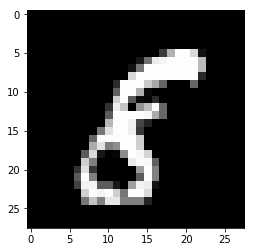

In [6]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

## 通过 PyTorch 构建神经网络
<img src="assets/mlp_mnist.png" width=600px>

In [8]:
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.autograd import Variable

In [10]:
## 创建Network类
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # 输入层，784(28x28)个输入结点, 128个输出结点
        self.fc1 = nn.Linear(784, 128)
        
        # 隐藏层1，128个结点
        self.fc2 = nn.Linear(128, 64)
        
        # 隐藏层2，64个结点，10个输出结点
        self.fc3 = nn.Linear(64, 10)

    # 前向反馈
    # 多个线性模型组合
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)  ## 使用ReLU作为激活函数
        x = self.fc2(x)
        x = F.relu(x)  ## 使用ReLU作为激活函数
        x = self.fc3(x)
        
        return x
    
    def predict(self, x):
        logits = self.forward(x)
        
        # 输出层的激活函数为softmax
        return F.softmax(logits, dim=1)

net = Network()
net

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

## 初始化权重和偏差

In [12]:
# 权重和偏差是系统自动初始化的
print(net.fc1.weight)
print(net.fc1.bias)

Parameter containing:
tensor([[-0.0089, -0.0221,  0.0229,  ...,  0.0175, -0.0260, -0.0007],
        [ 0.0119,  0.0101,  0.0322,  ...,  0.0001, -0.0207,  0.0326],
        [-0.0094, -0.0032,  0.0151,  ..., -0.0060, -0.0154, -0.0098],
        ...,
        [-0.0053,  0.0126, -0.0291,  ..., -0.0357,  0.0117,  0.0223],
        [ 0.0316, -0.0158,  0.0085,  ...,  0.0015, -0.0201, -0.0150],
        [ 0.0048,  0.0081, -0.0069,  ..., -0.0192,  0.0240,  0.0119]],
       requires_grad=True)
Parameter containing:
tensor([ 8.6090e-04, -1.9321e-03, -1.2645e-02,  3.9039e-03,  3.1447e-02,
        -1.6927e-02,  1.6798e-02,  3.2625e-02, -8.9394e-03,  3.3288e-02,
         1.1732e-02,  2.8500e-02, -2.9979e-02,  7.7392e-03,  1.1497e-03,
         9.0768e-03, -1.8520e-02, -1.5038e-02, -4.7915e-05,  2.7768e-02,
        -2.3800e-02, -3.4064e-03, -3.0228e-02, -3.2392e-02,  2.4574e-02,
        -2.9148e-02,  7.8110e-03,  9.3110e-03, -2.6416e-03,  2.4457e-02,
        -2.2507e-02,  6.9867e-03, -1.3338e-02, -9.3756e-0

In [14]:
# 偏差设置为0， 原地修改
# net.fc1.bias本身是autograd变量，无法修改
net.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
# 权重系数设置为标准差为0.01的正态分布
net.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0147,  0.0169,  0.0051,  ...,  0.0031, -0.0169, -0.0119],
        [ 0.0096,  0.0060,  0.0053,  ..., -0.0126,  0.0119,  0.0379],
        [ 0.0044, -0.0107, -0.0116,  ..., -0.0048, -0.0007,  0.0047],
        ...,
        [-0.0029,  0.0062,  0.0117,  ..., -0.0126, -0.0056, -0.0020],
        [ 0.0051, -0.0051,  0.0038,  ..., -0.0073,  0.0018,  0.0239],
        [ 0.0074,  0.0021, -0.0011,  ..., -0.0218,  0.0021,  0.0083]])

## 前向反馈

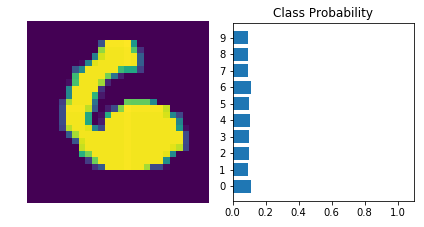

In [20]:
data_iter = iter(train_loader)
images, labels = data_iter.next()
images.resize_(64, 1, 784)

## 包装输入数据
inputs = Variable(images)

img_idx = 0
logits = net.forward(inputs[img_idx, :])

# 预测
ps = F.softmax(logits, dim=1)

img = images[img_idx]

# 预测出来的每个数字的概率基本相同，原因是神经网络并未训练
helper.view_classify(img.resize_(1, 28, 28), ps)

## 更简单的方式

In [24]:
input_size = 784
hidden_size = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_size[0]), # 线性模型
                     nn.ReLU(),  # 激活函数
                     nn.Linear(hidden_size[0], hidden_size[1]),
                     nn.ReLU(),
                     nn.Linear(hidden_size[1], output_size),
                     nn.Softmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


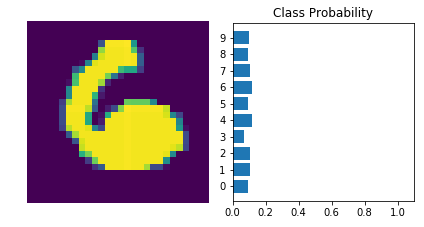

In [25]:
images. labels = next(iter(train_loader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0, :]) # 第1张图
helper.view_classify(images[0].view(1, 28, 28), ps)

## 为每一层都设置名字

In [26]:
## 使用OrderedDict
from collections import OrderedDict
model = nn.Sequential(OrderedDict([('fc1', nn.Linear(input_size, hidden_size[0])),
                                  ('relu1', nn.ReLU()),
                                  ('fc2', nn.Linear(hidden_size[0], hidden_size[1])),
                                  ('relu2', nn.ReLU()),
                                  ('output', nn.Linear(hidden_size[1], output_size)),
                                  ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

In [27]:
# 访问指定层
model.fc1

Linear(in_features=784, out_features=128, bias=True)

## 自定义神经网络

In [29]:
hidden_size = [400, 200, 100]
my_model = nn.Sequential(OrderedDict([('fc1', nn.Linear(input_size, hidden_size[0])),
                                  ('relu1', nn.ReLU()),
                                  ('fc2', nn.Linear(hidden_size[0], hidden_size[1])),
                                  ('relu2', nn.ReLU()),
                                  ('fc3', nn.Linear(hidden_size[1], hidden_size[2])),
                                  ('relu3', nn.ReLU()),
                                  ('output', nn.Linear(hidden_size[2], output_size)),
                                  ('softmax', nn.Softmax(dim=1))]))

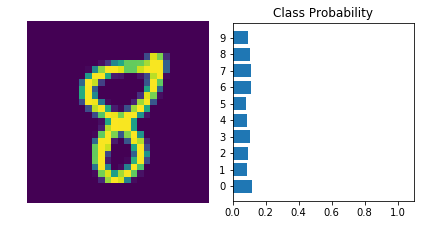

In [31]:
## Run this cell with your model to make sure it works ##
# Forward pass through the network and display output
images, labels = next(iter(train_loader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)